# Decision Boundaries For Quadratic Discriminant Analysis

Assume that a classification is to be made. Given the parameters $\boldsymbol{\theta}$ and the input vector $\textbf{x}$, the class of the output variable $y$ is to be determined. The probability of $y$ being from the class $c$ is modeled using a discrete generative model as follows:
$$
p\left (y=c|\textbf{x}, \boldsymbol{\theta}\right )=\frac{p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )p\left ( y=c|\boldsymbol{\theta}\right )}{p\left (\textbf{x}|\boldsymbol{\theta} \right )}
$$
If a multivariate Gaussian distribution is used to model the class conditional distribution of the input vector, i.e. $p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )$, then this is called the quadratic discriminant analysis:
$$
p\left (\textbf{x}|y=c, \boldsymbol{\theta}\right )=\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma}_{c} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c} \right )^{T}\boldsymbol{\Sigma}_{c}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c} \right )\right ]
$$
The name "quadratic" comes from the fact that the decision boundaries separating classes are in general quadratic.
Let the decision boundary between two classes be drawn to illustrate the quadratic boundary. First, the following equation is to be solved:
$$
p\left (y=c_{1}|\textbf{x}, \boldsymbol{\theta}\right )=p\left (y=c_{2}|\textbf{x}, \boldsymbol{\theta}\right ) \Rightarrow \frac{p\left (\textbf{x}|y=c_{1}, \boldsymbol{\theta}\right )p\left ( y=c_{1}|\boldsymbol{\theta}\right )}{p\left (\textbf{x}|\boldsymbol{\theta} \right )}=\frac{p\left (\textbf{x}|y=c_{2}, \boldsymbol{\theta}\right )p\left ( y=c_{2}|\boldsymbol{\theta}\right )}{p\left (\textbf{x}|\boldsymbol{\theta} \right )} \Rightarrow
$$
$$
p\left (\textbf{x}|y=c_{1}, \boldsymbol{\theta}\right )p\left ( y=c_{1}|\boldsymbol{\theta}\right )=p\left (\textbf{x}|y=c_{2}, \boldsymbol{\theta}\right )p\left ( y=c_{2}|\boldsymbol{\theta}\right ) \Rightarrow
$$
$$
\pi_{1}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma}_{c_{1}} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c_{1}} \right )^{T}\boldsymbol{\Sigma}_{c_{1}}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c_{1}} \right )\right ] = \pi_{2}\frac{1}{\left (2\pi \right )^{D/2} \left | \boldsymbol{\Sigma}_{c_{2}} \right |^{1/2}}\exp \left [-\frac{1}{2}\left (\textbf{x}-\boldsymbol{\mu}_{c_{2}} \right )^{T}\boldsymbol{\Sigma}_{c_{2}}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c_{2}} \right )\right ]
$$
After taking the natural logarithm of both sides, the following simplified form is obtained:
$$
0 = \frac{1}{2}\left [ \left (\textbf{x}-\boldsymbol{\mu}_{c_{1}} \right )^{T}\boldsymbol{\Sigma}_{c_{1}}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c_{1}} \right )- \left (\textbf{x}-\boldsymbol{\mu}_{c_{2}} \right )^{T}\boldsymbol{\Sigma}_{c_{2}}^{-1} \left (\textbf{x}-\boldsymbol{\mu}_{c_{2}} \right )\right ]+\frac{1}{2}\log \left (\frac{\left | \boldsymbol{\Sigma}_{c_{1}} \right |}{\left | \boldsymbol{\Sigma}_{c_{2}} \right |} \right )-\log\left (\frac{\pi_{c_{1}}}{\pi_{c_{2}}} \right )
$$
Since $\textbf{x}$, $\boldsymbol{\mu}_{c_{1}}$ and $\boldsymbol{\mu}_{c_{2}}$ are column vectors, $\left (\textbf{x}-\boldsymbol{\mu}_{c_{1}} \right )^{T}=\textbf{x}^{T}-\boldsymbol{\mu}_{c_{1}}^{T}$ and $\left (\textbf{x}-\boldsymbol{\mu}_{c_{2}} \right )^{T}=\textbf{x}^{T}-\boldsymbol{\mu}_{c_{2}}^{T}$. After these equalities are used in the above equation, the following final form is obtained:
$$
0=\frac{1}{2}\textbf{x}^{T}\left (\boldsymbol{\Sigma}_{c_{1}}^{-1}-\boldsymbol{\Sigma}_{c_{2}}^{-1}\right )\textbf{x}-\textbf{x}^{T} \left (\boldsymbol{\Sigma}_{c_{1}}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\Sigma}_{c_{2}}^{-1}\boldsymbol{\mu}_{c_{2}} \right )+\frac{1}{2} \left (\boldsymbol{\mu}_{c_{1}}^{T} \boldsymbol{\Sigma}_{c_{1}}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\mu}_{c_{2}}^{T} \boldsymbol{\Sigma}_{c_{2}}^{-1}\boldsymbol{\mu}_{c_{2}}\right )+\frac{1}{2}\log \left (\frac{\left | \boldsymbol{\Sigma}_{c_{1}} \right |}{\left | \boldsymbol{\Sigma}_{c_{2}} \right |} \right )-\log \left (\frac{\pi_{c_{1}}}{\pi_{c_{2}}} \right )
$$
This is a quadratic form. Hence, the decision boundary between the two classes is quadratic. Now, let this boundary be drawn for $D=2$, i.e. for the case when the random vectors are of dimension 2. If $A \triangleq \boldsymbol{\Sigma}_{c_{1}}^{-1}-\boldsymbol{\Sigma}_{c_{2}}^{-1}$, $B \triangleq \boldsymbol{\Sigma}_{c_{1}}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\Sigma}_{c_{2}}^{-1}\boldsymbol{\mu}_{c_{2}}$ and $\textbf{x}=\left [x_{1} \ x_{2} \right ]^{T}$, then:
$$
0=\frac{1}{2}a_{22}x_{2}^{2} + \left [ \frac{1}{2} \left (a_{12}+a_{21} \right )x_{1}-b_{21}\right ]x_{2}+\left [\frac{1}{2}a_{11}x_{1}^{2}-b_{11}x_{1}+\frac{1}{2}\left ( \boldsymbol{\mu}_{c_{1}}^{T} \boldsymbol{\Sigma}_{c_{1}}^{-1}\boldsymbol{\mu}_{c_{1}}-\boldsymbol{\mu}_{c_{2}}^{T} \boldsymbol{\Sigma}_{c_{2}}^{-1}\boldsymbol{\mu}_{c_{2}}\right )+\frac{1}{2}\log \left (\frac{\left | \boldsymbol{\Sigma}_{c_{1}} \right |}{\left | \boldsymbol{\Sigma}_{c_{2}} \right |} \right )- \log \left (\frac{\pi_{c_{1}}}{\pi_{c_{2}}} \right )\right ]
$$
gives element $x_{2}$ given element $x_{1}$ of $\textbf{x}$.

The covariance matrices of the distributions are to be formed. They must be positive definite. Let the distribution's eigenvectors be $v_1$ and $v_{2}$. Let the corresponding eigenvalues be $\lambda_{1}$ and $\lambda_{2}$ respectively. Then:
$$
\boldsymbol{\Sigma}_{c}=\begin{bmatrix}
v_{1} & v_{2}
\end{bmatrix}\begin{bmatrix}
\lambda_{1} & 0 \\
0 & \lambda_{2}
\end{bmatrix}\begin{bmatrix}
v_{1} & v_{2}
\end{bmatrix}^{-1}
$$

In [1]:
import numpy as np
v1_t = np.array([1, 3]) # transpose of the first eigenvector
v2_t = np.array([3, -1]) # transpose of the second eigenvector
eigenvector_matrix = np.array([v1_t, v2_t]).transpose() # eigenvector matrix
lambda1 = 1 # first eigenvalue
lambda2 = 2 # second eigenvalue
eigenvalue_matrix = np.array([[lambda1, 0],[0, lambda2]])
print("the eigenvector matrix of the first distribution:")
print(eigenvector_matrix)
print("the eigenvalue matrix of the first distribution")
print(eigenvalue_matrix)
cov_1 = eigenvector_matrix * eigenvalue_matrix * np.linalg.inv(eigenvector_matrix)
print("the covariance matrix of the first distribution")
print(cov_1)
mean_1_t = np.array([1, 1]) # the mean vector of the first distribution
print("transpose of the mean vector of the first distribution")
print(mean_1_t)

the eigenvector matrix of the first distribution:
[[ 1  3]
 [ 3 -1]]
the eigenvalue matrix of the first distribution
[[1 0]
 [0 2]]
the covariance matrix of the first distribution
[[0.1 0. ]
 [0.  0.2]]
transpose of the mean vector of the first distribution
[1 1]


In [2]:
v1_t = np.array([-1, 4]) # transpose of the first eigenvector
v2_t = np.array([4, 1]) # transpose of the second eigenvector
eigenvector_matrix = np.array([v1_t, v2_t]).transpose() # eigenvector matrix
lambda1 = 4 # first eigenvalue
lambda2 = 2 # second eigenvalue
eigenvalue_matrix = np.array([[lambda1, 0],[0, lambda2]])
print("the eigenvector matrix of the second distribution:")
print(eigenvector_matrix)
print("the eigenvalue matrix of the second distribution")
print(eigenvalue_matrix)
cov_2 = eigenvector_matrix * eigenvalue_matrix * np.linalg.inv(eigenvector_matrix)
print("the covariance matrix of the second distribution")
print(cov_2)
mean_2_t = np.array([2, 3]) # the mean vector of the second distribution
print("transpose of the mean vector of the second distribution")
print(mean_2_t)

the eigenvector matrix of the second distribution:
[[-1  4]
 [ 4  1]]
the eigenvalue matrix of the second distribution
[[4 0]
 [0 2]]
the covariance matrix of the second distribution
[[0.23529412 0.        ]
 [0.         0.11764706]]
transpose of the mean vector of the second distribution
[2 3]


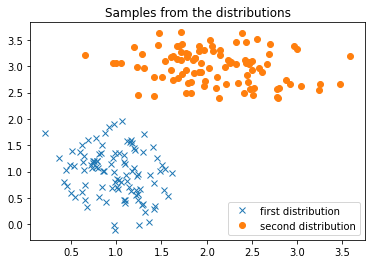

In [3]:
import matplotlib.pyplot as plt

# samples from the first distribution
x1, y1 = np.random.default_rng().multivariate_normal(mean_1_t, cov_1, 100).T

# samples from the second distribution
x2, y2 = np.random.default_rng().multivariate_normal(mean_2_t, cov_2, 100).T

fig, ax = plt.subplots()
_ = ax.plot(x1, y1, 'x', label='first distribution')
_ = ax.plot(x2, y2, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the distributions')

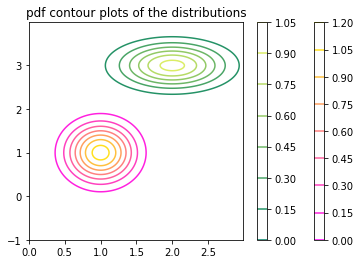

In [4]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[0:3:.01, -1:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(mean_1_t, cov_1)
rv2 = multivariate_normal(mean_2_t, cov_2)

cmap1 = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("summer")

fig, ax = plt.subplots()
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)

_ = ax.set_title('pdf contour plots of the distributions')